<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230210_Flipkart_Reviews_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/02/15/flipkart-reviews-sentiment-analysis-using-python/

In [7]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv')
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


In [6]:
data.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [9]:
stopword = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer('english')

In [10]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [11]:
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [12]:
data['clean_review'] = data['Review'].apply(clean)

In [13]:
data.head()

,Product_name,Review,Rating,clean_review
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,best great performancei got around backup bi...
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,good perfom
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,great perform usual also game laptop issu batt...
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,wife happi best product 👌🏻😘
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,light weight laptop new amaz featur batteri li...


In [14]:
px.pie(data, values=data['Rating'].value_counts().values, names=data['Rating'].value_counts().index, hole=0.5, title='Ratings distributions')

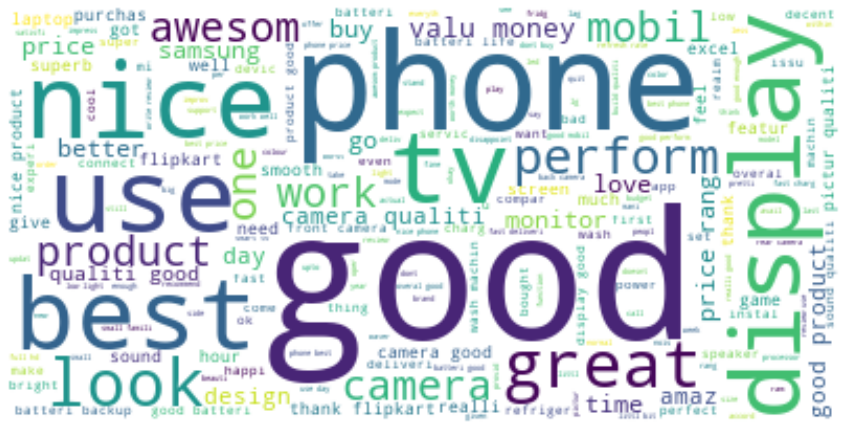

In [15]:
text = ' '.join(i for i in data['clean_review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
sentiments = SentimentIntensityAnalyzer()

In [18]:
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['clean_review']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['clean_review']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['clean_review']]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['clean_review']]

In [19]:
data[['Review', 'clean_review', 'Positive', 'Negative', 'Neutral']]

,Review,clean_review,Positive,Negative,Neutral
0,Best under 60k Great performanceI got it for a...,best great performancei got around backup bi...,0.395,0.101,0.504
1,Good perfomence...,good perfom,0.744,0.000,0.256
2,Great performance but usually it has also that...,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,My wife is so happy and best product 👌🏻😘,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,"Light weight laptop with new amazing features,...",light weight laptop new amaz featur batteri li...,0.000,0.000,1.000
...,...,...,...,...,...
2299,"Great display, accurate colours at this price ...",great display accur colour price rang,0.451,0.000,0.549
2300,Superb monitor first brought 1 used for 2 mont...,superb monitor first brought use month bough...,0.339,0.000,0.661
2301,Awesome,awesom,0.000,0.000,1.000
2302,Only one issue with adapter,one issu adapt,0.000,0.000,1.000


In [20]:
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])
c = sum(data['Compound'])

In [21]:
def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print('Positive ;)')
  elif (b>a) and (b>c):
    print('Negative :(')
  else:
    print('Neutral :/')

In [22]:
sentiment_score(x,y,z)

Neutral :/


In [23]:
print('Positive: ', x)
print('Negative: ', y)
print('Neutral: ', z)
print('Compound: ', c)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006
Compound:  1331.1438999999953
